In [25]:
import numpy              as np
import matplotlib.pyplot  as plt
import itea               as sr
import matplotlib.patches as patches

from sklearn.datasets import load_diabetes
from sklearn          import linear_model
from matplotlib.path  import Path
from matplotlib.lines import Line2D
from matplotlib       import rc

plt.style.use('default')
rc('text', usetex=True)

print('Done')

Done


In [26]:
def parallel_plot(host, data, names, groups, legends=False):
    
    # Menores e maiores valores de cada coluna
    datamins = data.min(axis=0)
    datamaxs = data.max(axis=0)
    
    # range de cada coluna
    datadelta = datamaxs - datamins
    
    datamins -= datadelta * 0.05  # add 5% padding below and above
    datamaxs += datadelta * 0.05

    # Para inverter uma coluna, fazer como a linha abaixo com o número da coluna
    #datamaxs[1], datamins[1] = datamaxs[1], datamins[1] 
    
    datadelta = datamaxs - datamins

    # normalizando os intervalos das colunas para serem todos no mesmo valor
    zs        = np.zeros_like(data)
    zs[:, 0]  = data[:, 0]
    zs[:, 1:] = (data[:, 1:] - datamins[1:]) / datadelta[1:] * datadelta[0] + datamins[0]

    # Criando os eixos paralelos
    axes = [host] + [host.twinx() for i in range(data.shape[1] - 1)]
    
    for i, ax in enumerate(axes):
        if datamins[i] == datamaxs[i]:
            ax.set_ylim(datamins[i]*0.9, datamaxs[i]*1.1)
        else:
            ax.set_ylim(datamins[i], datamaxs[i])
            
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (data.shape[1] - 1)))

    # Ajustando o eixo principal (axs passado como 'host')
    host.set_xlim(0, data.shape[1] - 1)
    host.set_xticks(range(data.shape[1]))
    host.set_xticklabels(names, fontsize=14)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_bottom()
    
    legend_handles = [
        Line2D([0,1],[0,1], lw=lw, c=c, alpha=a, ls=ls)
        for _, c, a, ls, lw, label in groups
    ]
    
    for i, ((init, end), color, alpha, linestyle, linewidth, label) in enumerate(groups):
        for j in range(init, end, 1):
            if j>len(data):
                continue
                
            line = data[0, :]
            
            # curvas bezier
            verts = list(zip(
                [x for x in np.linspace(0, len(data) - 1, len(data) * 3 - 2, endpoint=True)],
                np.repeat(zs[j, :], 3)[1:-1]
            ))
            
            # path.LINETO, path.CURVE4
            codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
            path  = Path(verts, codes)
            patch = patches.PathPatch(
                path, facecolor='none', lw=linewidth, alpha=alpha, edgecolor=color, linestyle=linestyle,
                zorder=len(groups) - j
            )
            host.add_patch(patch)
        
    if legends:
        host.legend(
            legend_handles, [label for _, _, _, _, _, label in groups],
            loc='lower center', bbox_to_anchor=(0.5, -0.35),
            ncol=len(groups), fancybox=True, shadow=True, edgecolor=None
        )
    
    return host
    
    
# -----------------------------------------------------------------------------
data    = load_diabetes()
ynames  = data.feature_names
X, y    = data.data, data.target 

In [18]:
params = {
    'popsize'  : 100,
    'gens'     : 50, 
    'minterms' : 1,
    'model'    : linear_model.LinearRegression(n_jobs=-1),
    'funs'     : {
        "id"      : lambda x: x,
        "sin"     : np.sin, 
        "cos"     : np.cos,        
        "tanh"    : np.tanh,
        "sqrt.abs": lambda x: np.sqrt(np.absolute(x)),
        "log"     : np.log, 
        "exp"     : np.exp,
    },
    'expolim'  : (-2, 2),
    'maxterms' : 4,
}

#X, y = load_diabetes(return_X_y=True)

itea = sr.ITEA(**params)
bestsol = itea.run(X, y, log=None, verbose=True)

gen	best fitness	mean fitness	mean length
0/50	72.47264485720302	76.28588333802985	2.31
1/50	72.47264485720302	75.8893204783709	2.64
2/50	72.4113298226661	75.48055280542376	3.12
3/50	72.41121749250226	74.77139527983697	3.39
4/50	72.41121749250226	73.95649080168678	3.6
5/50	71.471383409212	73.25129426189582	3.62
6/50	71.92478013669847	72.84840880055168	3.58
7/50	71.92478013669847	72.45658073219042	3.68
8/50	71.84131493024171	72.43002114315142	3.58
9/50	71.54561676460757	72.47394573247303	3.58
10/50	64.47088486356367	72.05236486950643	3.67
11/50	64.47088486356367	71.94060877779931	3.6
12/50	64.47088487169904	71.72468873360896	3.62
13/50	64.47088487169904	71.34135079323654	3.53
14/50	64.47088486356367	71.11021867374892	3.46
15/50	64.13077689417474	70.21984128218632	3.53
16/50	64.13077689417474	69.63858704711457	3.4
17/50	64.13077689417474	68.89589079509147	3.3
18/50	64.13077689417474	66.77115619452927	3.23
19/50	64.11440146121052	65.17540672402737	3.27
20/50	63.905103168883365	64.80059649

In [27]:
print(bestsol)

37.059*tanh(x0^2 * x1^-2 * x2^-2 * x3^-2 * x4^-2 * x5^2 * x6^-2 * x7^-2 * x8) + -9.476*tanh(x0^2 * x2^-1 * x3^-1 * x6^-1 * x7^-2 * x8^2 * x9^-2) + 12.637*tanh(x0^-1 * x1^-2 * x2^-1 * x3 * x5^-2 * x6^2 * x7 * x8^2 * x9^-1) + -13.567*tanh(x2^-1 * x3^2 * x4^-2 * x5^-2 * x6^2 * x7^-1 * x8^2) + 156.676


[ 2 -2 -2 -2 -2  2 -2 -2  1  0] <ufunc 'tanh'> 37.05912120428875
[ 2  0 -1 -1  0  0 -1 -2  2 -2] <ufunc 'tanh'> -9.475973396525358
[-1 -2 -1  1  0 -2  2  1  2 -1] <ufunc 'tanh'> 12.637418383694165
[ 0  0 -1  2 -2 -2  2 -1  2  0] <ufunc 'tanh'> -13.567411143369092


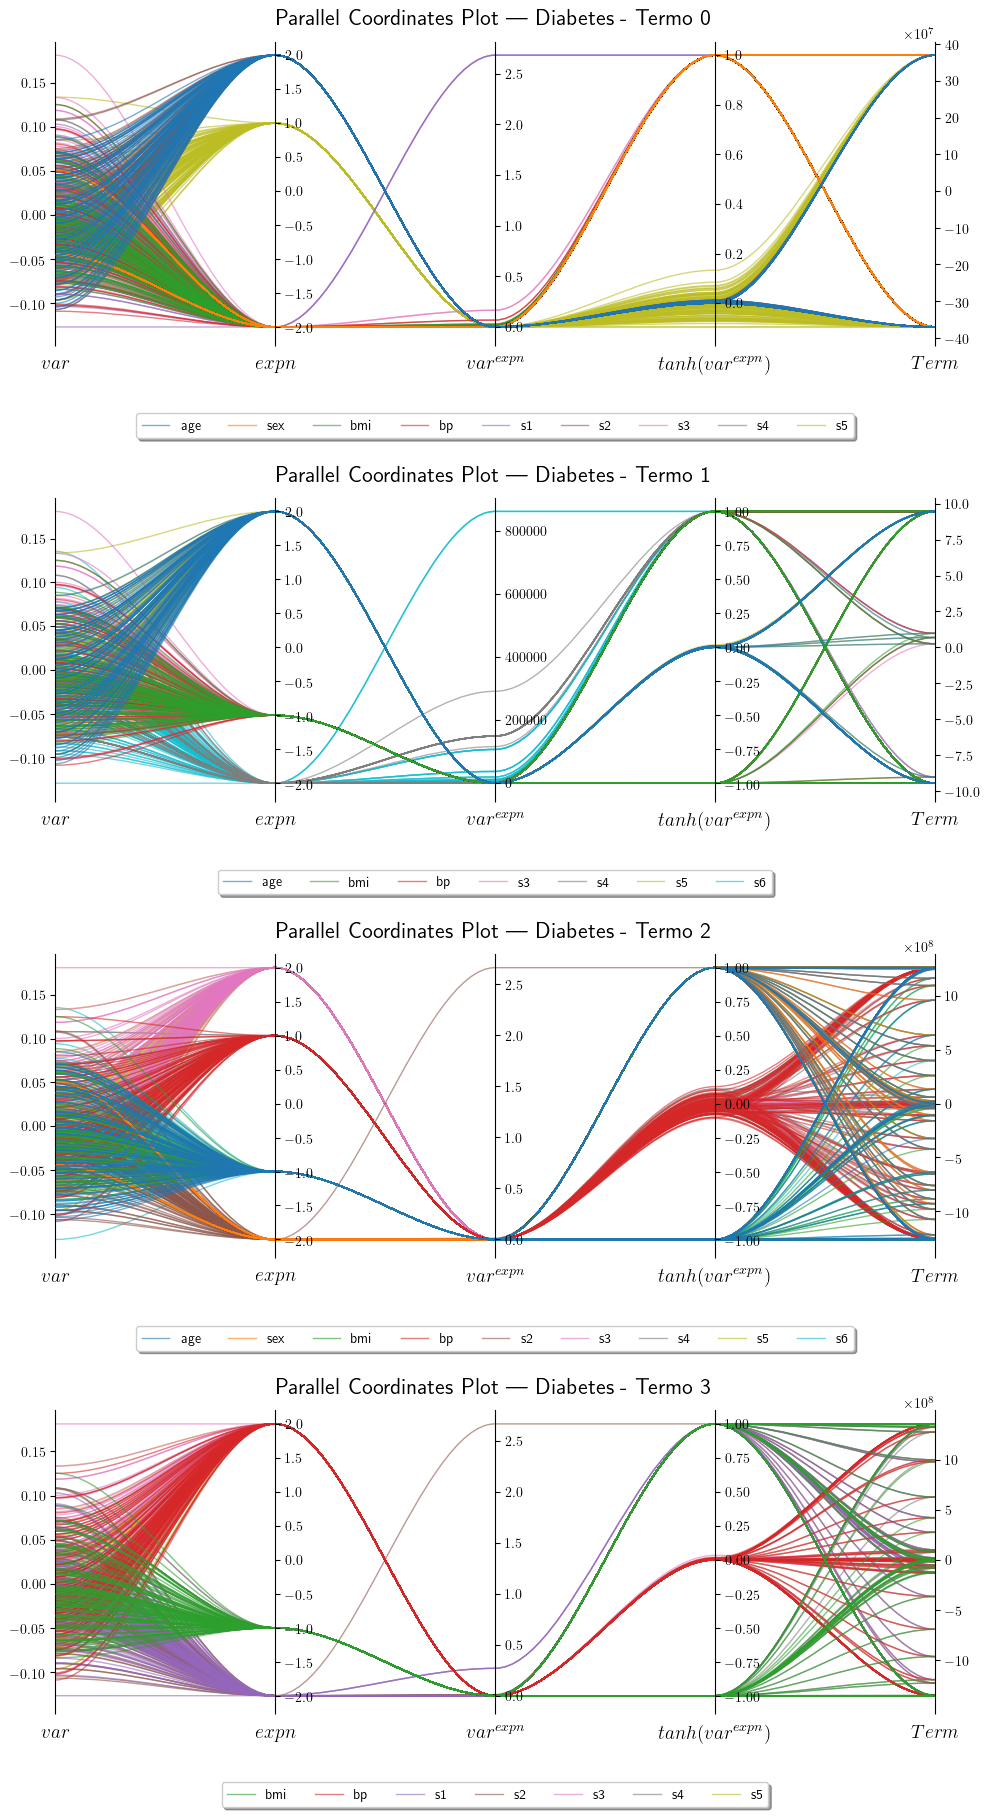

In [36]:
def parallel_plot_term(axs, term, func, coeff):
    print(term, func, coeff)
    
    data   = []
    groups = []
    colors = plt.cm.tab10.colors

    nsamples = 100
    # pegar cada feature por vez
    for i, t in zip(range(len(X[0])), term):

        count = 0
        # pegar amostras (para cada um, vamos fazer variável por variável):
        for j in range(nsamples):
            x = X[j][i]

            # Omitindo os que são elevados a 0
            if t!=0:
                evaluate_to = coeff*func(np.prod(X[j]**term))
                data.append([x, t, x**t, np.tanh(x**t), evaluate_to])
                count += 1

        # criando o grupo para essa variável
        if count >0:
            groups.append(((len(data)-count, len(data)), colors[i], 0.6, '-', 1, ynames[i]))

    data = np.array(data)
    
    return parallel_plot(
        axs, data, ['$var$', '$expn$', '$var^{expn}$', '$tanh(var^{expn})$', '$Term$'],
        groups, legends=True
    )
    
    

    
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10,20))
axs[0] = parallel_plot_term(axs[0], bestsol.terms[0], bestsol.funcList[bestsol.funcs[0]], bestsol.coeffs[0])
axs[0].set_title('Parallel Coordinates Plot — Diabetes - Termo 0', fontsize=16, pad=12)

axs[1] = parallel_plot_term(axs[1], bestsol.terms[1], bestsol.funcList[bestsol.funcs[1]], bestsol.coeffs[1])
axs[1].set_title('Parallel Coordinates Plot — Diabetes - Termo 1', fontsize=16, pad=12)

axs[2] = parallel_plot_term(axs[2], bestsol.terms[2], bestsol.funcList[bestsol.funcs[2]], bestsol.coeffs[2])
axs[2].set_title('Parallel Coordinates Plot — Diabetes - Termo 2', fontsize=16, pad=12)

axs[3] = parallel_plot_term(axs[3], bestsol.terms[3], bestsol.funcList[bestsol.funcs[3]], bestsol.coeffs[3])
axs[3].set_title('Parallel Coordinates Plot — Diabetes - Termo 3', fontsize=16, pad=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# O primeiro termo parece ser binário
# O segundo tem a possibilidade de avaliar para zero
# O terceiro e o quarto resultam em diferentes avaliações, com um intervalo de 10e8.
# Mas repare que o 3 termo usa poucas variáveis para obter o resultado - as outras podem ter menos peso.

# Interpretando o plot

Todas as variáveis que tem um expoente 0, resultando em 1 (elemento neutro da multiplicação e, portanto, indiferente para o termo na hora de realizar a interação entre as variáveis) são omitidas. Note que o dataset original tem 10 variáveis, mas na legenda aparecem menos. Se olharmos o termo, vemos que temos algumas variáveis com expoente 0, então o valor que elas assumem é irrelevante.

## Primeira paralela $var$ (variáveis)

A primeira paralela separa, por cores (indicadas nas legendas), as 10 variáveis (features) do dataset de diabetes utilizado no regressor. Neste plot, não é possível parear cada uma das variáveis para obter o sample correspondente, a ideia é mostrar onde diferentes valores entram na hora de serem elevados ao seu expoente.

## Segunda paralela $expn$ (expoentes)

Como um termo IT associa, para cada variável do problema, um expoente ao qual essa variável será elevada antes da interação, a segunda paralela recebe como entrada as variáveis correspondentes. Vemos que não ocorrem expoentes 1 (a variável não é modificada quando o expoente é 1), e que a maioria converge para o -2. Lembrando que $x^{-n} = \frac{1}{x^n}$, então essas variáveis viram o denominador da interação.

## Terceira paralela $var^{expn}$ (elevação das variáveis aos seus expoentes)

É a combinação do valor da primeira paralela elevado ao valor da segunda paralela.

## Quarta paralela $Term$ (Termo IT avaliado)

Cada variável de uma mesma amostra, ao ser elevada para seu expoente, interage com as variáveis correspondentes da amostra e então a função de transformação é aplicada. Cada amostra irá ter diferentes linhas (pois são coloridas de acordo com a variável da amostra), e então as correspondentes irão convergir para um valor avaliado pelo termo IT. É possível ver que, mesmo com vários valores das diferentes amostras, após serem elevadas ao expoentes, multiplicadas entre si e aplicada a função de transformação, não há muitos valores diferentes que a função de transformação pode assumir. Na verdade, assumem 16 ou -16 (parece um classificador binário) - possivelmente com diferenças decimais entre elas que são imperceptíveis para nós.